# image mode conversion (grayscale mode L, b&w mode 1)

(800, 600) RGB
顯示1，1位置上顏色資訊： (127, 0, 128)
RGB mode:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [254 254 254 ... 254 254 254]
 ...
 [  1   1   1 ...   1   1   1]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
----------------------------------------------------------------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
----------------------------------------------------------------------
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 ...
 [254 254 254 ... 254 254 254]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
----------------------------------------------------------------------
L mode:
(800, 600) L
[[76 76 76 ... 76 76 76]
 [76 76 76 ... 76 76 76]
 [76 76 76 ... 76 76 76]
 ...
 [29 29 29 ... 29 29 29]
 [29 29 29 ... 29 29 29]
 [29 29 29 ... 29 29 29]]
-----------------------------------------------------

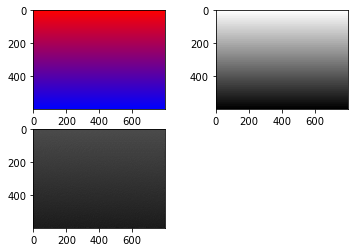

In [2]:
#converting to L mode(grayscale) , 1 mode(black and white) 

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
im = Image.open('./img/r_to_b.png')
im1 = Image.open('./img/r_to_b.png').convert('L')
im2 = Image.open('./img/r_to_b.png').convert('1')
print(im.size,im.mode)
print('顯示1，1位置上顏色資訊：',im.getpixel((1,300)))

#RGB mode 
print('RGB mode:')
print(np.array(im.getchannel(0)))
print('-'*70)
print(np.array(im.getchannel(1)))
print('-'*70)
print(np.array(im.getchannel(2)))
print('-'*70)
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(im)

#L mode (grey scale)
print('L mode:')
print(im1.size,im1.mode)
print(np.array(im1.getchannel(0)))
print('-'*70)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(im1,cmap="gray")

#1 mode （black white)
print('1 mode:')
print(im2.size,im2.mode)
print(np.array(im2.getchannel(0)))
print('-'*70)
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(im2)

plt.show()

## image invert

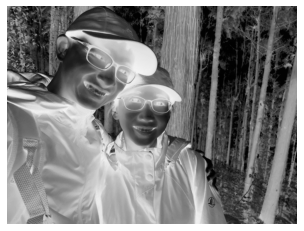

In [3]:
from PIL import Image
import numpy as np
im=Image.open('./img/amanda.jpg').convert('L')
imarr = np.array(im.getchannel(0))
imarr2 = 255 - imarr
im2 = Image.fromarray(imarr2)

plt.imshow(im2, cmap='gray')
plt.axis('off')
plt.show()

## split RGB channel, operate then merge back

R channel:
 [[141 145 140 ... 220 222 224]
 [144 145 138 ... 220 221 223]
 [145 142 134 ... 220 221 221]
 ...
 [ 90  90  91 ... 207 210 211]
 [ 91  91  92 ... 205 208 209]
 [ 91  91  93 ... 205 207 208]]
G channel:
 [[130 134 129 ... 206 208 210]
 [133 134 127 ... 206 207 209]
 [134 131 123 ... 206 207 207]
 ...
 [ 86  86  87 ... 210 213 214]
 [ 87  87  88 ... 208 211 212]
 [ 87  87  89 ... 208 210 211]]
B channel:
 [[110 114 109 ... 205 207 209]
 [113 114 107 ... 205 206 208]
 [114 111 103 ... 205 206 206]
 ...
 [103 103 104 ... 189 192 193]
 [104 104 105 ... 187 190 191]
 [104 104 106 ... 187 189 190]]
after dstack:
 [[[114 125 145]
  [110 121 141]
  [115 126 146]
  ...
  [ 35  49  50]
  [ 33  47  48]
  [ 31  45  46]]

 [[111 122 142]
  [110 121 141]
  [117 128 148]
  ...
  [ 35  49  50]
  [ 34  48  49]
  [ 32  46  47]]

 [[110 121 141]
  [113 124 144]
  [121 132 152]
  ...
  [ 35  49  50]
  [ 34  48  49]
  [ 34  48  49]]

 ...

 [[165 169 152]
  [165 169 152]
  [164 168 151]
  ...
 

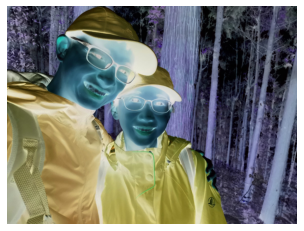

In [6]:
# we can transform RGB image into grayscale images of each channel, perform operations to them, then convert back to RGB

im = Image.open('./img/amanda.jpg')
Rarray = np.array(im.getchannel(0))  # can also do this way :  imarray = np.array(im); r = imarray[:,:,0]
Garray = np.array(im.getchannel(1))  # g = imarray[:,:,1]
Barray = np.array(im.getchannel(2))  # b = imarray[:,:,2]

print('R channel:\n',Rarray)
print('G channel:\n',Garray)
print('B channel:\n',Barray)

imarray = np.dstack((255-Rarray,255-Garray,255-Barray)) #note: tuple of r,g,b grayscale array

print('after dstack:\n', imarray)
im2 = Image.fromarray(imarray,'RGB')
plt.imshow(im2)
plt.axis('off') # turn off axis
plt.show()

### extract r,g,b channel as ndarray

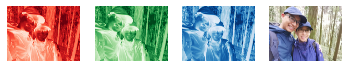

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = Image.open('./img/amanda.jpg')
imarray = np.array(im)
r = imarray[:,:,0]  # [H,W,3] -- [:,:,0] means taking all of H, all of W, but only index 0 of 3, which is essentially the red channel
g = imarray[:,:,1]
b = imarray[:,:,2]

'''
np.save('r1.npy',r)
np.save('r1.npy',g)
np.save('r1.npy',b)
'''

fig = plt.figure()
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.imshow(Image.fromarray(r),cmap='Reds')  # better is Image.fromarray(r)
ax2.imshow(g,cmap='Greens') #note!!! this is not the correct RGB channel image! see below
ax3.imshow(b,cmap='Blues')
ax4.imshow(Image.fromarray(np.dstack((r,g,b)),'RGB')) # combine rgb channel together

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

plt.show()

In [8]:
#note the differece in displaying W,H / H,W

im = Image.open('./img/amanda.jpg')
print(im.size) # W,H
print(np.array(im).shape) # H or rows ,W or columns, 3 channel

(2364, 1773)
(1773, 2364, 3)


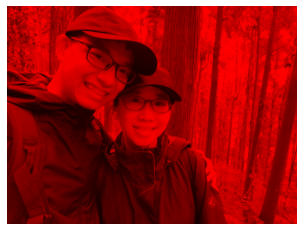

In [9]:
# generate red channel image by setting green and blue to 0

im = Image.open('./img/amanda.jpg')
imarray = np.array(im)
imarray[:,:,0] #do nothing
imarray[:,:,1] = 0
imarray[:,:,2] = 0
plt.imshow(Image.fromarray(imarray,"RGB"))
plt.axis('off')
plt.show()